In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Set display options
# pd.set_option('display.max_columns', None)

# Load the dataset
data_path = r'c:/Users/dipes/Desktop/5th Sem/ML/DATASET/COVID-19 IN INDIA/covid_19_india.csv'
df = pd.read_csv(data_path)

# Show first few rows
df.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
 # Check structure
 df.info()
 df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
count,18110.000000,18110,18110,18110,18110,18110,1.811000e+04,18110.000000,1.811000e+04
unique,NaN,560,7,46,62,12,NaN,NaN,NaN
top,NaN,2020-06-11,8:00 AM,Kerala,-,-,NaN,NaN,NaN
freq,NaN,37,16472,560,17664,17664,NaN,NaN,NaN
mean,9055.500000,NaN,NaN,NaN,NaN,NaN,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,NaN,NaN,NaN,NaN,NaN,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,NaN,NaN,NaN,NaN,NaN,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,NaN,NaN,NaN,NaN,NaN,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,NaN,NaN,NaN,NaN,NaN,2.788698e+05,3643.750000,3.001498e+05


# Check missing values
df.isnull().sum()

# Filled missing values in 'Recovered' and 'Deaths' with 0'
df['Cured'] = df['Cured'].fillna(0)
df['Deaths'] = df['Deaths'].fillna(0)
df = df.dropna(subset=['State/UnionTerritory'])
df.isnull().sum()

In [7]:
le = LabelEncoder()
df['State/UnionTerritory_encoded'] = le.fit_transform(df['State/UnionTerritory'])
df[['State/UnionTerritory', 'State/UnionTerritory_encoded']].head()

,State/UnionTerritory,State/UnionTerritory_encoded
0,Kerala,22
1,Kerala,22
2,Kerala,22
3,Kerala,22
4,Kerala,22


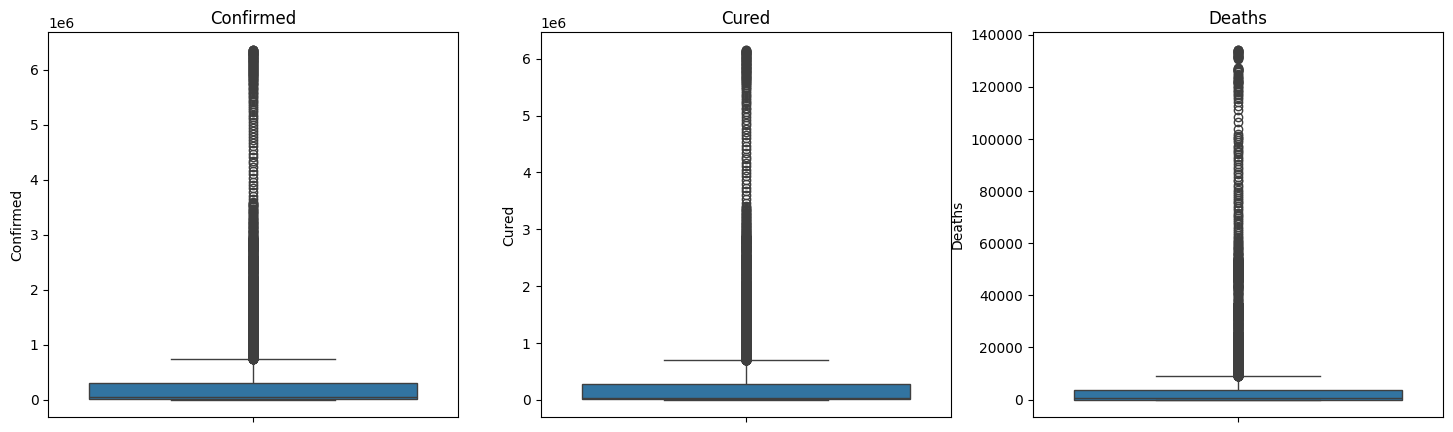

,Confirmed,Cured,Deaths
count,18110.000000,18110.000000,18110.000000
mean,195510.177499,179183.181005,2336.710001
std,265685.594322,247186.967583,3218.989621
min,0.000000,0.000000,0.000000
25%,4376.750000,3360.250000,32.000000
50%,39773.500000,33364.000000,588.000000
75%,300149.750000,278869.750000,3643.750000
max,743809.250000,692134.000000,9061.375000


In [7]:
# Boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df['Confirmed'], ax=axes[0]); axes[0].set_title('Confirmed')
sns.boxplot(y=df['Cured'], ax=axes[1]); axes[1].set_title('Cured')
sns.boxplot(y=df['Deaths'], ax=axes[2]); axes[2].set_title('Deaths')
plt.show()

# IQR method to cap outliers
for col in ['Confirmed', 'Cured', 'Deaths']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
df[['Confirmed', 'Cured', 'Deaths']].describe()

In [8]:
scaler = MinMaxScaler()
df[['Confirmed_scaled', 'Cured_scaled', 'Deaths_scaled']] = scaler.fit_transform(df[['Confirmed', 'Cured', 'Deaths']])
df[['Confirmed_scaled', 'Cured_scaled', 'Deaths_scaled']].head()

scaler_std = StandardScaler()
df[['Confirmed_std', 'Cured_std', 'Deaths_std']] = scaler_std.fit_transform(df[['Confirmed', 'Cured', 'Deaths']])
df[['Confirmed_std', 'Cured_std', 'Deaths_std']].head()

,Confirmed_std,Cured_std,Deaths_std
0,-0.735887,-0.724909,-0.725934
1,-0.735887,-0.724909,-0.725934
2,-0.735883,-0.724909,-0.725934
3,-0.735879,-0.724909,-0.725934
4,-0.735879,-0.724909,-0.725934


D:\temp\build\ipykernel_13636\3477653695.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


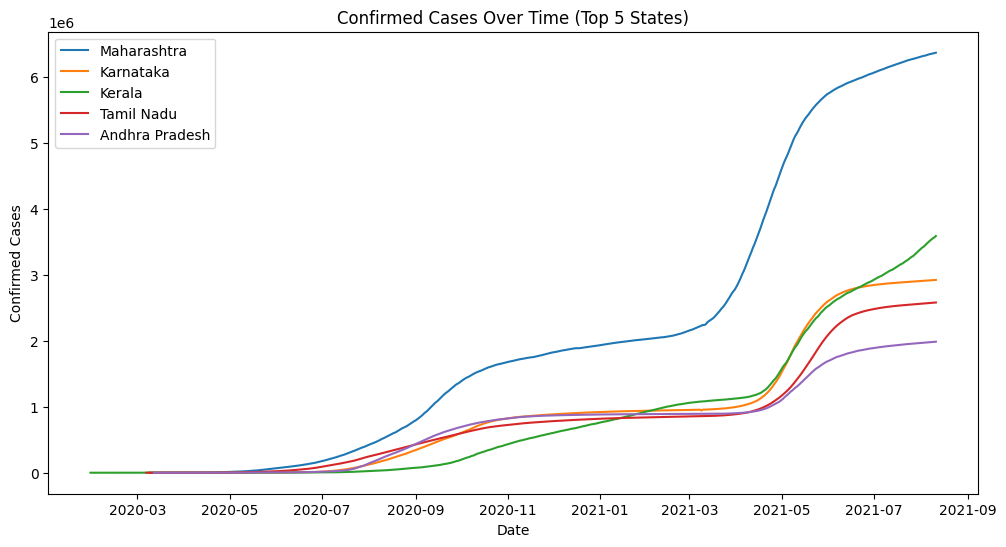

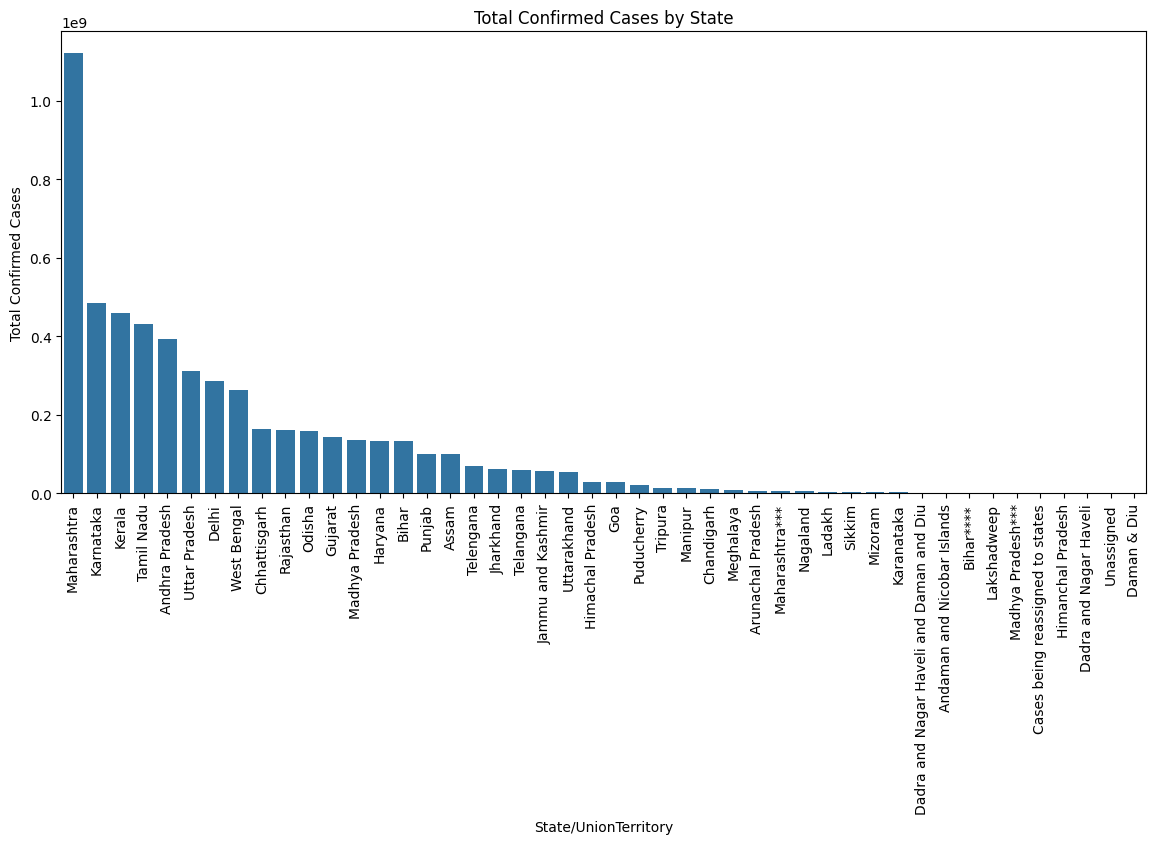

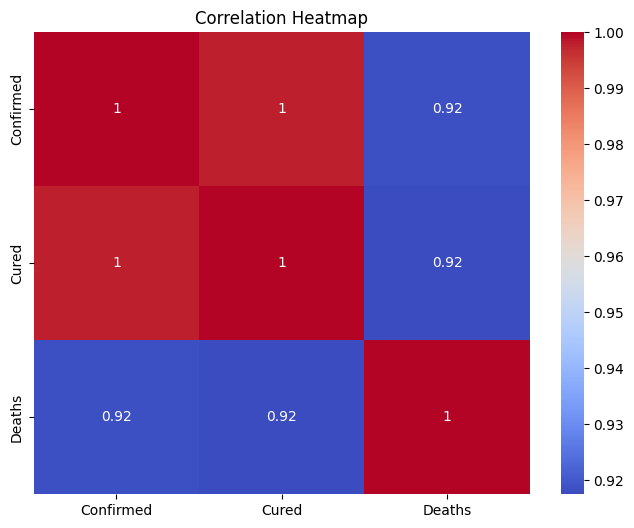

In [9]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Line plot: Confirmed cases over time for top 5 states
top_states = df.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=False).head(5).index
plt.figure(figsize=(12,6))
for state in top_states:
    state_data = df[df['State/UnionTerritory'] == state]
    plt.plot(state_data['Date'], state_data['Confirmed'], label=state)
plt.title('Confirmed Cases Over Time (Top 5 States)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

# Bar chart: Total confirmed cases by state
state_totals = df.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=state_totals.index, y=state_totals.values)
plt.xticks(rotation=90)
plt.title('Total Confirmed Cases by State')
plt.ylabel('Total Confirmed Cases')
plt.show()

# Heatmap: Correlation between numerical features
plt.figure(figsize=(8,6))
sns.heatmap(df[['Confirmed', 'Cured', 'Deaths']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Correlation matrix
df[['Confirmed', 'Cured', 'Deaths']].corr()

,Confirmed,Cured,Deaths
Confirmed,1.000000,0.997751,0.918346
Cured,0.997751,1.000000,0.917529
Deaths,0.918346,0.917529,1.000000


=== OUTLIER DETECTION AND HANDLING IN COVID-19 DAILY CASES ===

=== OUTLIER SUMMARY ===


,Column,Total_Outliers_IQR,Outlier_Percentage_IQR,Lower_Bound_IQR,Upper_Bound_IQR,Total_Outliers_ZScore,Outlier_Percentage_ZScore,Max_Value,Min_Value
0,Confirmed,0,0.0,-439282.75,743809.25,0,0.0,743809.25,0.0
1,Cured,0,0.0,-409904.00,692134.00,0,0.0,692134.00,0.0
2,Deaths,0,0.0,-5385.62,9061.38,0,0.0,9061.38,0.0


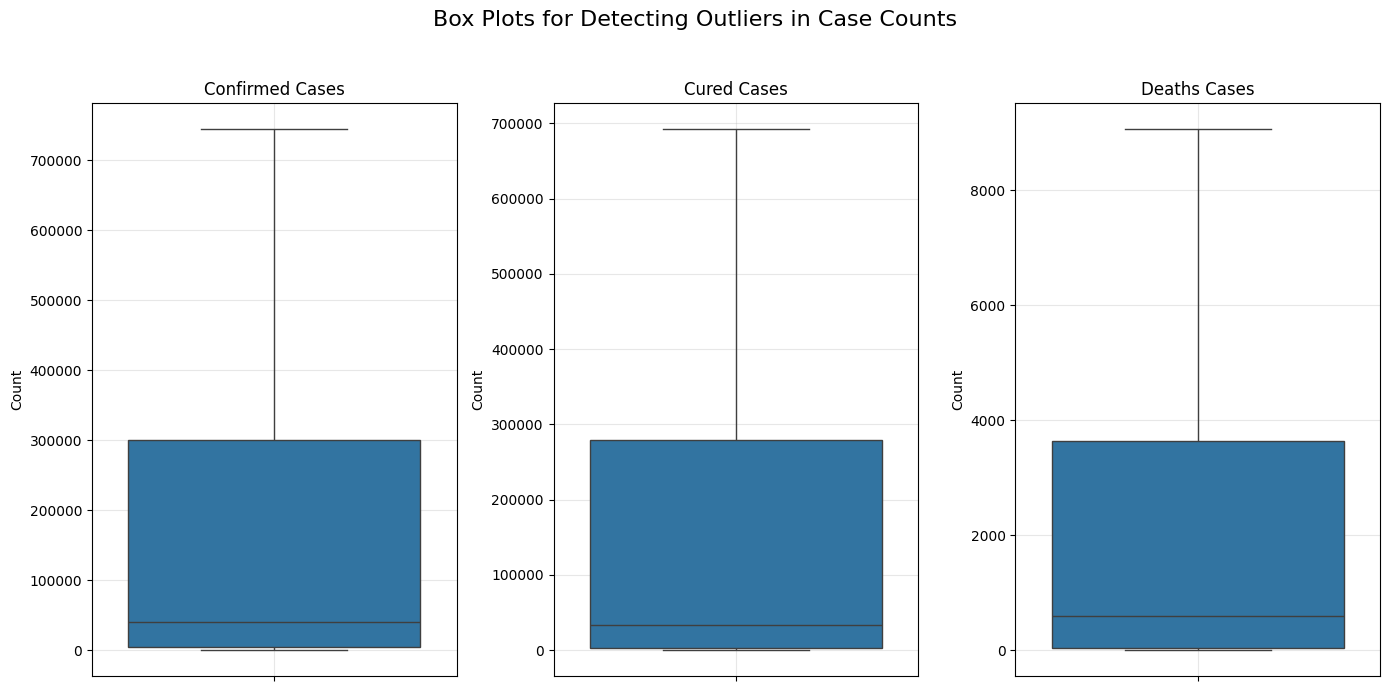

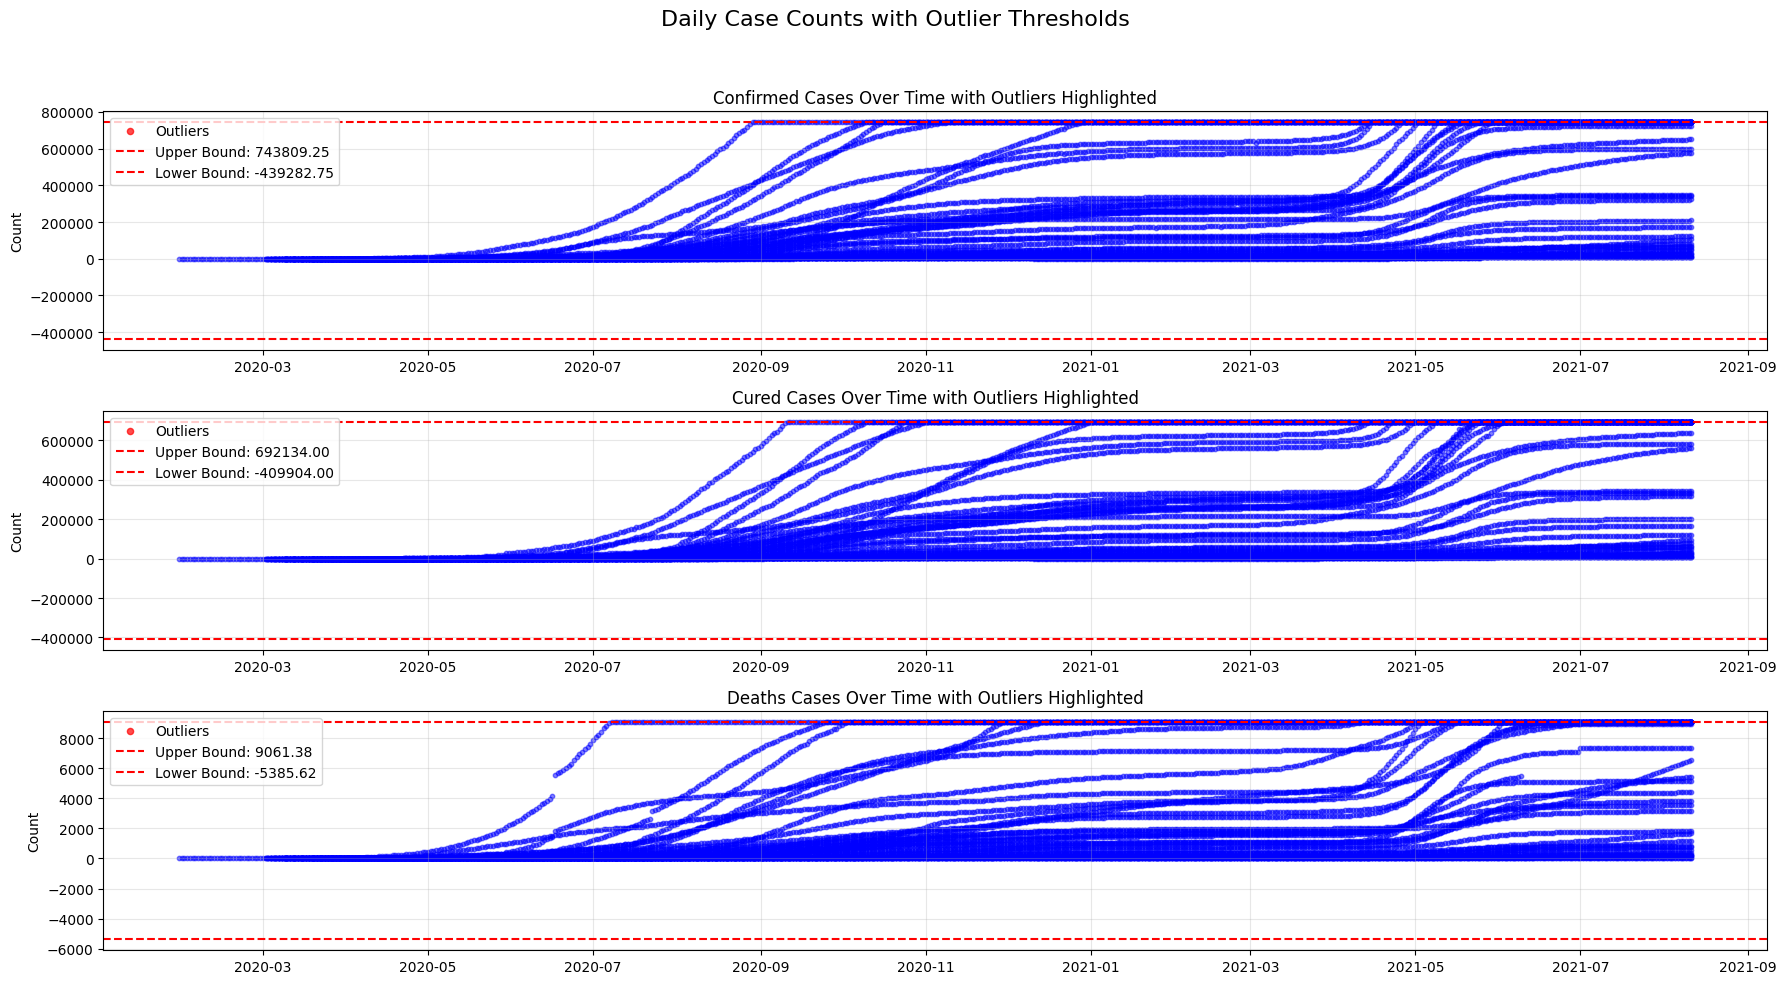


=== STATE-WISE OUTLIER ANALYSIS ===


,State,Total_Outliers,Outlier_Percentage
29,Jharkhand,271,18.14
19,Gujarat,268,17.52
13,Uttarakhand,264,17.09
22,Bihar,256,16.86
5,Haryana,247,15.65
26,Goa,246,16.27
20,Himachal Pradesh,244,16.01
24,Mizoram,227,14.98
33,Meghalaya,221,15.19
21,Madhya Pradesh,211,13.85


D:\temp\build\ipykernel_5880\1931743496.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Outlier_Percentage', data=top_states, palette='viridis')


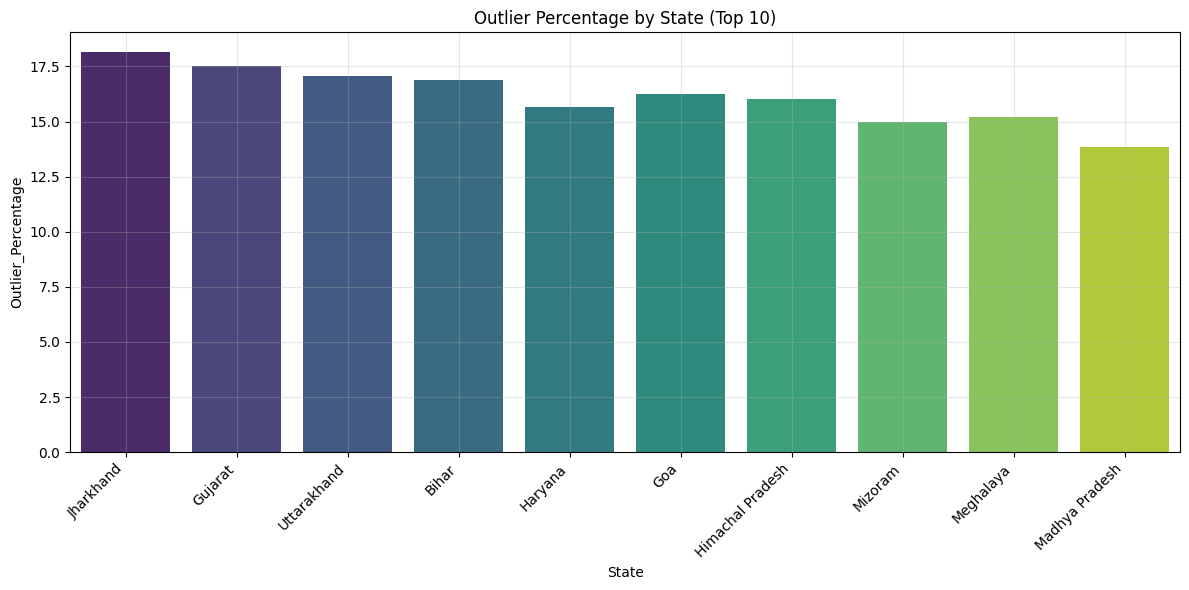


=== HANDLING OUTLIERS ===
Column Confirmed:
  - 0 values capped at lower bound (-439282.75)
  - 0 values capped at upper bound (743809.25)
Column Cured:
  - 0 values capped at lower bound (-409904.00)
  - 0 values capped at upper bound (692134.00)
Column Deaths:
  - 0 values capped at lower bound (-5385.62)
  - 0 values capped at upper bound (9061.38)


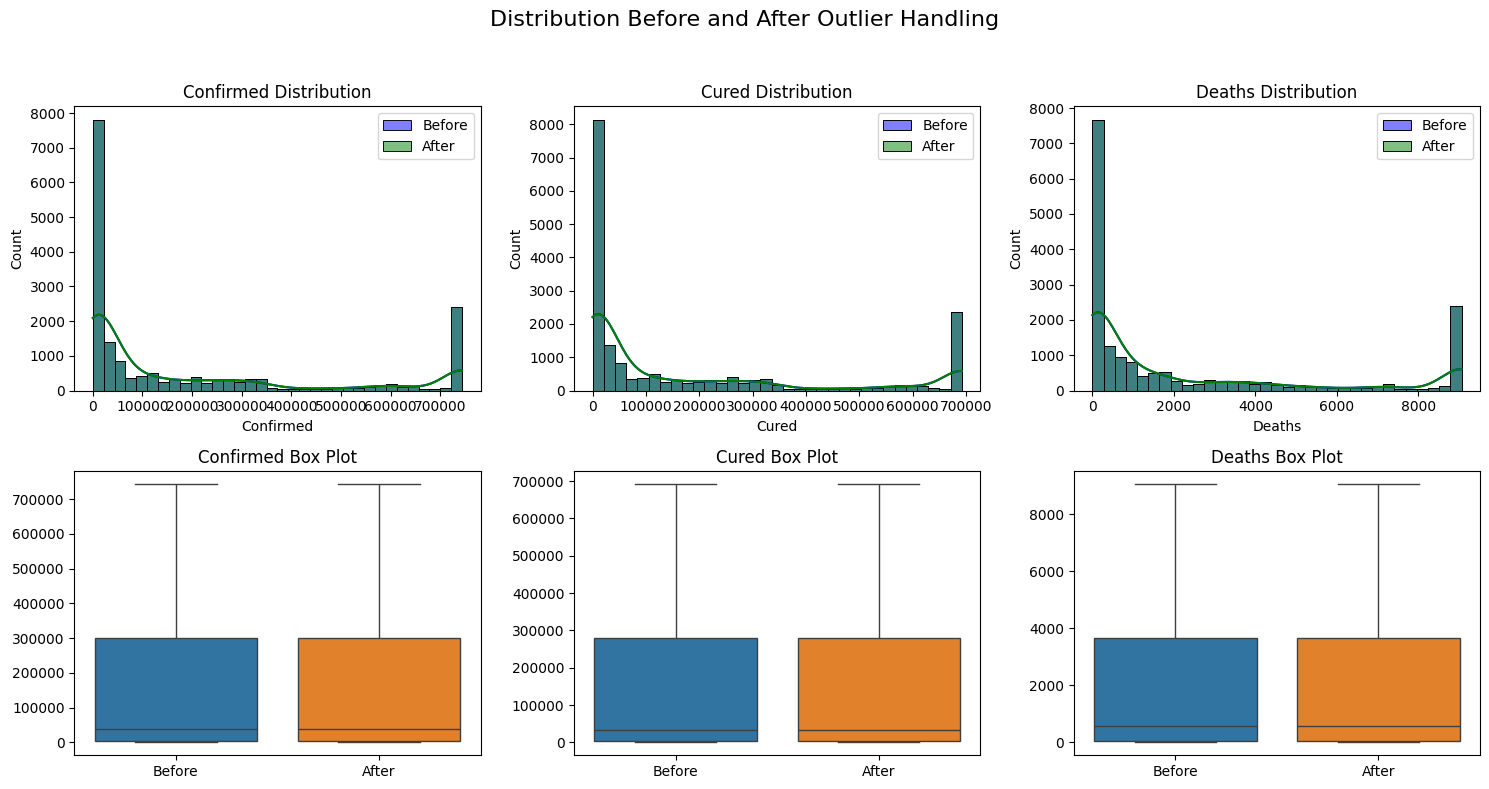


=== STATISTICAL COMPARISON ===

Column: Confirmed
Before outlier handling:
count     18110.00
mean     195510.18
std      265685.59
min           0.00
25%        4376.75
50%       39773.50
75%      300149.75
max      743809.25
Name: Confirmed, dtype: float64

After outlier handling:
count     18110.00
mean     195510.18
std      265685.59
min           0.00
25%        4376.75
50%       39773.50
75%      300149.75
max      743809.25
Name: Confirmed, dtype: float64

Column: Cured
Before outlier handling:
count     18110.00
mean     179183.18
std      247186.97
min           0.00
25%        3360.25
50%       33364.00
75%      278869.75
max      692134.00
Name: Cured, dtype: float64

After outlier handling:
count     18110.00
mean     179183.18
std      247186.97
min           0.00
25%        3360.25
50%       33364.00
75%      278869.75
max      692134.00
Name: Cured, dtype: float64

Column: Deaths
Before outlier handling:
count    18110.00
mean      2336.71
std       3218.99
min        

In [11]:
# Detect and Handle Outliers in Daily Case Counts
print("=== OUTLIER DETECTION AND HANDLING IN COVID-19 DAILY CASES ===")

# 1. Define functions for outlier detection using multiple methods
def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, column, threshold=3):
    """Detect outliers using Z-score method"""
    from scipy import stats
    z_scores = stats.zscore(data[column])
    outliers = data[abs(z_scores) > threshold]
    return outliers

# 2. Identify and analyze outliers in each case count column
case_columns = ['Confirmed', 'Cured', 'Deaths']
print("\n=== OUTLIER SUMMARY ===")

outlier_summary = []
for column in case_columns:
    # IQR method
    outliers_iqr, lower, upper = detect_outliers_iqr(df, column)
    
    # Z-score method
    outliers_zscore = detect_outliers_zscore(df, column)
    
    # Summarize results
    outlier_summary.append({
        'Column': column,
        'Total_Outliers_IQR': len(outliers_iqr),
        'Outlier_Percentage_IQR': (len(outliers_iqr) / len(df)) * 100,
        'Lower_Bound_IQR': lower,
        'Upper_Bound_IQR': upper,
        'Total_Outliers_ZScore': len(outliers_zscore),
        'Outlier_Percentage_ZScore': (len(outliers_zscore) / len(df)) * 100,
        'Max_Value': df[column].max(),
        'Min_Value': df[column].min(),
    })

# Display outlier summary
outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df.round(2))

# 3. Visualize outliers - Box plots for each case type
plt.figure(figsize=(14, 7))
plt.suptitle('Box Plots for Detecting Outliers in Case Counts', fontsize=16)

for i, column in enumerate(case_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'{column} Cases')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 4. Time-series visualization to identify temporal patterns of outliers
plt.figure(figsize=(18, 10))
plt.suptitle('Daily Case Counts with Outlier Thresholds', fontsize=16)

for i, column in enumerate(case_columns, 1):
    # Get IQR thresholds
    _, lower, upper = detect_outliers_iqr(df, column)
    
    plt.subplot(3, 1, i)
    
    # Plot the time series
    plt.scatter(df['Date'], df[column], alpha=0.5, s=10, color='blue')
    
    # Highlight outliers
    outliers_iqr, _, _ = detect_outliers_iqr(df, column)
    plt.scatter(outliers_iqr['Date'], outliers_iqr[column], 
                color='red', s=20, alpha=0.7, label='Outliers')
    
    # Add threshold lines
    plt.axhline(y=upper, color='r', linestyle='--', 
                label=f'Upper Bound: {upper:.2f}')
    plt.axhline(y=lower, color='r', linestyle='--', 
                label=f'Lower Bound: {lower:.2f}')
    
    plt.title(f'{column} Cases Over Time with Outliers Highlighted')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 5. Visualize state-wise outliers
print("\n=== STATE-WISE OUTLIER ANALYSIS ===")
state_column = 'State/UnionTerritory'

# Count outliers by state
state_outlier_summary = []
for state in df[state_column].unique():
    state_data = df[df[state_column] == state]
    state_outliers = 0
    
    for column in case_columns:
        outliers, _, _ = detect_outliers_iqr(state_data, column)
        state_outliers += len(outliers)
    
    state_outlier_summary.append({
        'State': state,
        'Total_Outliers': state_outliers,
        'Outlier_Percentage': (state_outliers / (len(state_data) * len(case_columns))) * 100
    })

# Display state-wise outlier summary
state_outlier_df = pd.DataFrame(state_outlier_summary).sort_values('Total_Outliers', ascending=False)
display(state_outlier_df.head(10).round(2))

# Visualize outlier percentage by state (top 10)
plt.figure(figsize=(12, 6))
top_states = state_outlier_df.head(10)
sns.barplot(x='State', y='Outlier_Percentage', data=top_states, palette='viridis')
plt.title('Outlier Percentage by State (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Handle outliers - Create a copy with outliers handled
print("\n=== HANDLING OUTLIERS ===")

# Make a copy of the dataframe for outlier handling
df_no_outliers = df.copy()

# Handle outliers using capping method
for column in case_columns:
    # Get IQR thresholds
    _, lower_bound, upper_bound = detect_outliers_iqr(df, column)
    
    # Cap the outliers
    df_no_outliers[column] = df_no_outliers[column].clip(lower=lower_bound, upper=upper_bound)
    
    # Count how many values were modified
    capped_lower = (df[column] < lower_bound).sum()
    capped_upper = (df[column] > upper_bound).sum()
    
    print(f"Column {column}:")
    print(f"  - {capped_lower} values capped at lower bound ({lower_bound:.2f})")
    print(f"  - {capped_upper} values capped at upper bound ({upper_bound:.2f})")

# Compare distributions before and after outlier treatment
plt.figure(figsize=(15, 8))
plt.suptitle('Distribution Before and After Outlier Handling', fontsize=16)

for i, column in enumerate(case_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, color='blue', alpha=0.5, label='Before')
    sns.histplot(df_no_outliers[column], kde=True, color='green', alpha=0.5, label='After')
    plt.title(f'{column} Distribution')
    plt.legend()
    
    plt.subplot(2, 3, i+3)
    sns.boxplot(data=pd.DataFrame({
        'Before': df[column],
        'After': df_no_outliers[column]
    }))
    plt.title(f'{column} Box Plot')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("\n=== STATISTICAL COMPARISON ===")
for column in case_columns:
    print(f"\nColumn: {column}")
    print("Before outlier handling:")
    print(df[column].describe().round(2))
    print("\nAfter outlier handling:")
    print(df_no_outliers[column].describe().round(2))

# Assign the cleaned dataframe back to df if you want to use it for further analysis
# df = df_no_outliers.copy()

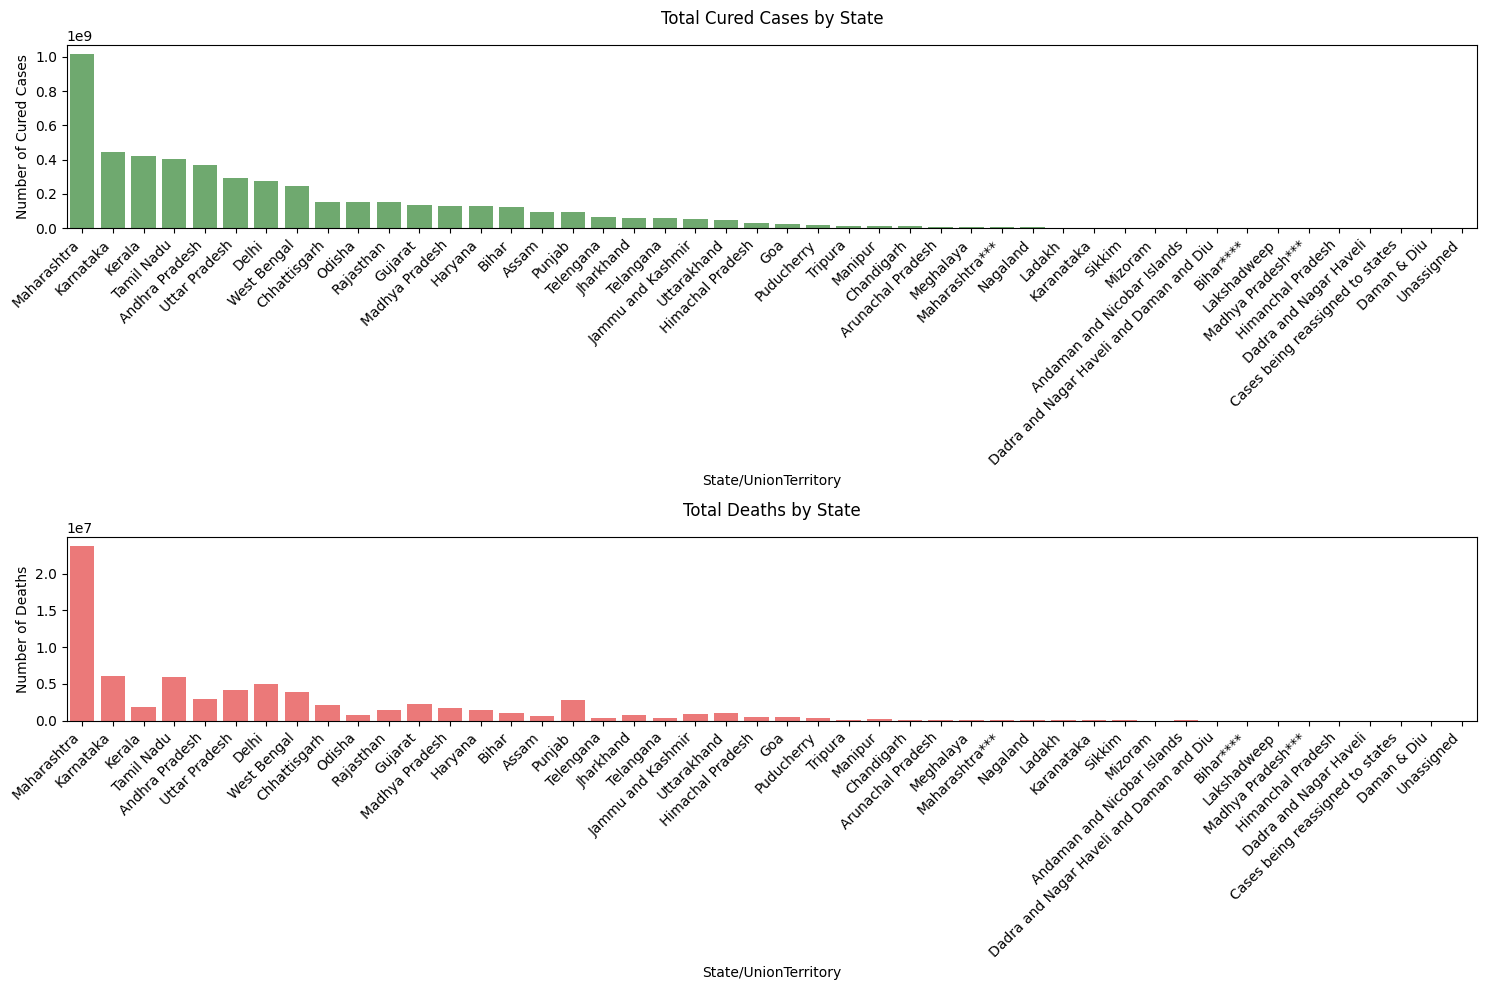

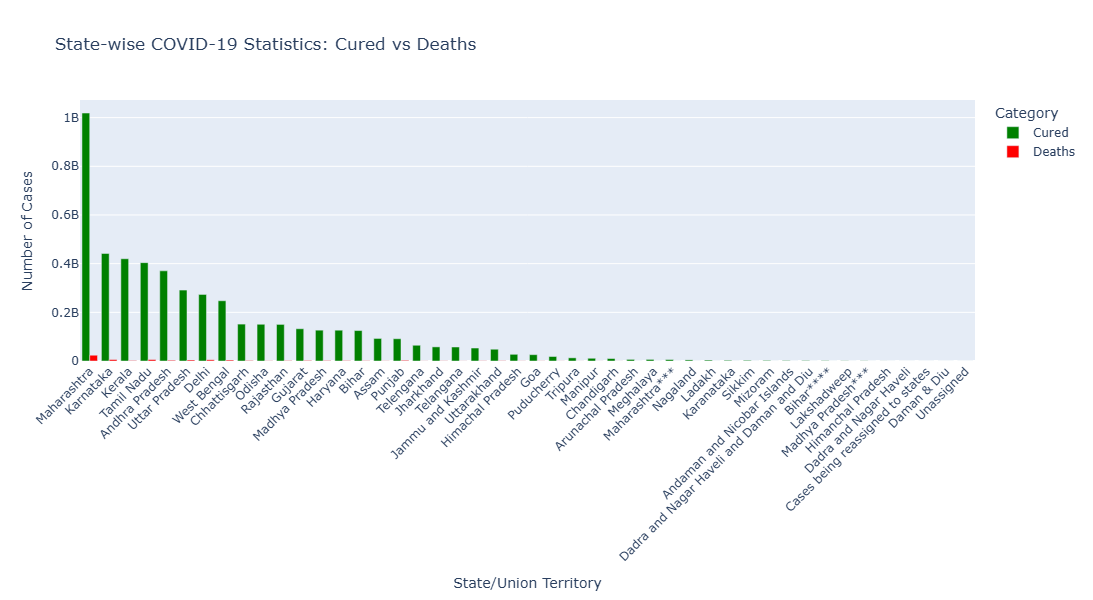


State-wise COVID-19 Statistics (Top 10 States):
                           Cured    Deaths
State/UnionTerritory                      
Maharashtra           1018765039  23737432
Karnataka              441844360   6053762
Kerala                 420174235   1888177
Tamil Nadu             404095807   5916658
Andhra Pradesh         370426530   2939367
Uttar Pradesh          291479351   4143450
Delhi                  273419887   4943294
West Bengal            247515102   3846989
Chhattisgarh           151609364   2063920
Odisha                 150923455    790814

Mortality Rate by State (Top 10):
                        Deaths       Cured  Mortality_Rate
State/UnionTerritory                                      
Punjab                 2785594    91458159            3.05
Maharashtra           23737432  1018765039            2.33
Maharashtra***          130753     6000911            2.18
Uttarakhand             986001    48362741            2.04
Sikkim                   53150     2747214    

In [12]:
# 1. Calculate state-wise totals
state_summary = df.groupby('State/UnionTerritory').agg({
    'Cured': 'sum',
    'Deaths': 'sum'
}).round(2)

# Sort by total cases
state_summary = state_summary.sort_values('Cured', ascending=False)

# 2. Bar Plot: State-wise Comparison
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.barplot(data=state_summary.reset_index(), x='State/UnionTerritory', y='Cured', 
            color='green', alpha=0.6)
plt.title('Total Cured Cases by State', fontsize=12, pad=15)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Cured Cases')

plt.subplot(2, 1, 2)
sns.barplot(data=state_summary.reset_index(), x='State/UnionTerritory', y='Deaths', 
            color='red', alpha=0.6)
plt.title('Total Deaths by State', fontsize=12, pad=15)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Deaths')

plt.tight_layout()
plt.show()

# 3. Interactive Visualization using Plotly
import plotly.express as px

# Create interactive bar chart
fig = px.bar(state_summary.reset_index(), x='State/UnionTerritory', y=['Cured', 'Deaths'],
             title='State-wise COVID-19 Statistics: Cured vs Deaths',
             barmode='group',
             color_discrete_map={'Cured': 'green', 'Deaths': 'red'},
             height=600)

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='State/Union Territory',
    yaxis_title='Number of Cases',
    legend_title='Category',
    showlegend=True
)
fig.show()

# 4. Print Tabular Summary (Top 10 states)
print("\nState-wise COVID-19 Statistics (Top 10 States):")
print("="*80)
print(state_summary.head(10).to_string())

# 5. Calculate and display mortality rate
state_summary['Mortality_Rate'] = (state_summary['Deaths'] / state_summary['Cured'] * 100).round(2)
print("\nMortality Rate by State (Top 10):")
print("="*50)
print(state_summary.sort_values('Mortality_Rate', ascending=False)
      .head(10)[['Deaths', 'Cured', 'Mortality_Rate']].to_string())